In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

# STACKING:-

In [2]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

classification Report:
               precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



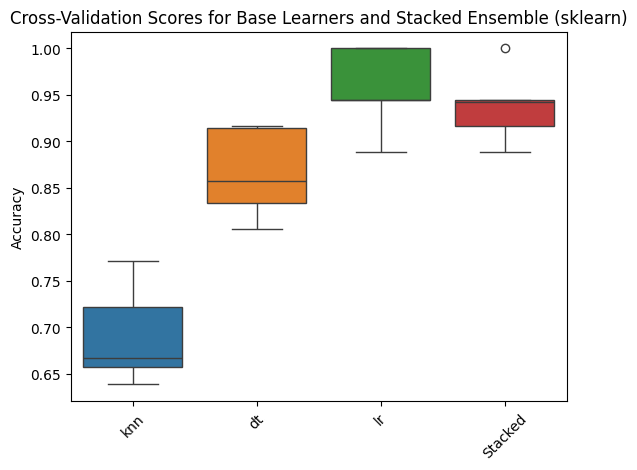

Final Stacking Classifier Accuracy (sklearn): 0.94


In [3]:
# Load the dataset
data = load_wine()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

# Define base learners (Level-0 Models) 
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression()),
]

# Define the meta-learner (Level-1 Model)
final_estimator = SVC()

# Create the StackingClassifier using sklearn
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5 )

# Train the StackingClassifier
clf.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print('classification Report:\n', class_report)

# Get cross-validation scores for each base learner and the stacked ensemble
cv_scores = []
for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores)
cv_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

# Plot cross-validation scores
sns.boxplot(data=cv_scores)
plt.xticks(range(len(estimators) + 1), [est[0] for est in estimators] + ["Stacked"], rotation=45)
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Base Learners and Stacked Ensemble (sklearn)')
plt.show()

# Print the final accuracy of the stacked ensemble
print(f"Final Stacking Classifier Accuracy (sklearn): {accuracy:.2f}")

# STACKING USING MLXtend:-

Classification Report:
               precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



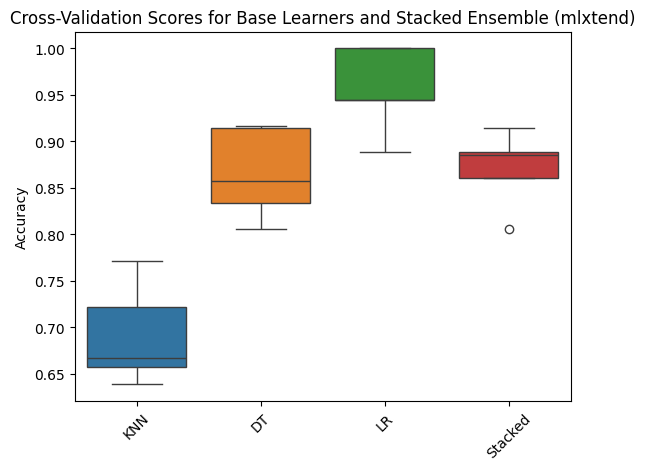

Final Stacking Classifier Accuracy (mlxtend): 0.94


In [6]:
from mlxtend.classifier import StackingClassifier

# Load the dataset
data = load_wine()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners (Level-0 Models)
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = LogisticRegression()

# Define the meta-learner (Level-1 Model)
meta_clf = SVC(probability=True)  # Ensure SVC can output probabilities

# Create the StackingClassifier using mlxtend
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=meta_clf)

# Train the StackingClassifier
sclf.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred = sclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", class_report)

# Get cross-validation scores for each base learner and the stacked ensemble
cv_scores = []
for clf in [clf1, clf2, clf3]:
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores)
cv_scores.append(cross_val_score(sclf, X, y, cv=5, scoring='accuracy'))

# Plot cross-validation scores
sns.boxplot(data=cv_scores)
plt.xticks(range(len([clf1, clf2, clf3]) + 1), ['KNN', 'DT', 'LR', 'Stacked'], rotation=45)
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Base Learners and Stacked Ensemble (mlxtend)')
plt.show()

# Print the final accuracy of the stacked ensemble
print(f"Final Stacking Classifier Accuracy (mlxtend): {accuracy:.2f}")


# CASCADING:-

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Cascade Ensemble Model:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



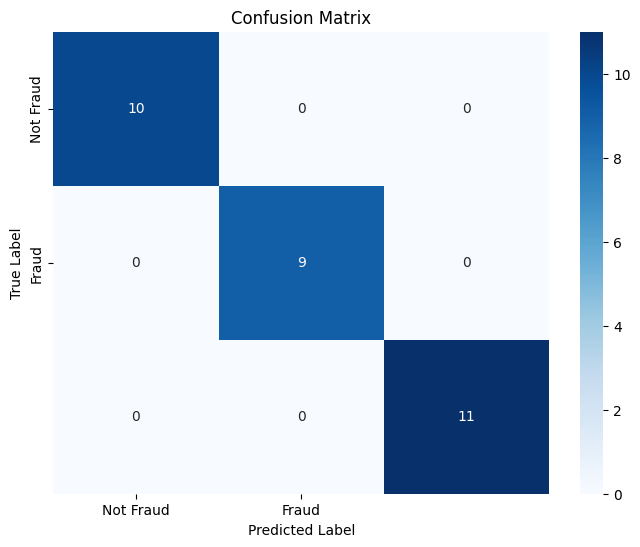

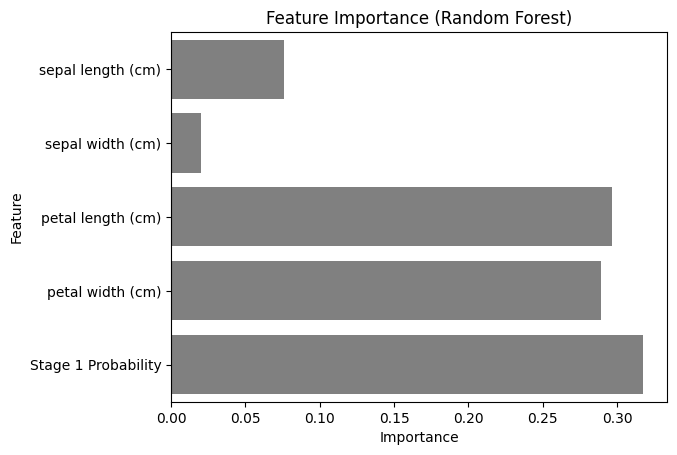

In [8]:
# Load the wine dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stage 1: Simple Logistic Regression
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_train)

# Add predicted probabilities from Stage 1 as new features
X_train_stage2 = np.column_stack((X_train, clf1.predict_proba(X_train)[:, 1]))

# Stage 2: Random Forest (with additional feature)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train_stage2, y_train)

# Prediction on test set (cascading through both stages)
y_pred_test_stage1 = clf1.predict(X_test)
X_test_stage2 = np.column_stack((X_test, clf1.predict_proba(X_test)[:, 1]))
y_pred_final = clf2.predict(X_test_stage2)


# Evaluation
print("Cascade Ensemble Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))


# Confusion Matrix (Seaborn Heatmap)
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


# Plot Feature Importances
sns.barplot(x=clf2.feature_importances_, y=list(data.feature_names) + ["Stage 1 Probability"], color='grey')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()